import libraries

In [64]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns

In [65]:
songs = pd.read_csv('df_audio_features_1000.csv')
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...


preparing and preprocessing data

In [66]:
# combine name and artist and id columns into a one column and drop html column
songs['name_artist'] = songs['name'] + ' -' + songs['artist']
songs.sample(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,name_artist
929,I'll Be Seeing You,Billie Holiday,0.355,0.0304,1,-20.479,1,0.0361,0.989,0.055500,0.1160,0.188,90.495,NaN,211533,3,4smkJW6uzoHxGReZqqwHS5,https://open.spotify.com/track/4smkJW6uzoHxGRe...,I'll Be Seeing You -Billie Holiday
455,Scenario - LP Mix,A Tribe Called Quest,0.795,0.6000,2,-14.004,1,0.3410,0.112,0.000171,0.1110,0.633,101.780,NaN,250133,4,0301nLjG0ti26rx5ZmfqtP,https://open.spotify.com/track/0301nLjG0ti26rx...,Scenario - LP Mix -A Tribe Called Quest
167,Cecilia,Simon & Garfunkel,0.755,0.8760,0,-8.867,1,0.0362,0.357,0.000005,0.2200,0.954,102.762,NaN,174827,4,6QhXQOpyYvbpdbyjgAqKdY,https://open.spotify.com/track/6QhXQOpyYvbpdby...,Cecilia -Simon & Garfunkel
1043,Kingston Town,Lord Creator,0.937,0.5120,10,-8.431,1,0.0986,0.569,0.013400,0.2400,0.965,115.180,NaN,189760,4,6UP58GoB80kzAX6eowFj3M,https://open.spotify.com/track/6UP58GoB80kzAX6...,Kingston Town -Lord Creator
858,Midnight Special - Rudy Van Gelder Digital Rem...,Jimmy Smith,0.704,0.2770,0,-11.675,1,0.0350,0.814,0.756000,0.0845,0.322,90.380,NaN,597280,4,6oWhUfePc5h9r5pfw7wvPN,https://open.spotify.com/track/6oWhUfePc5h9r5p...,Midnight Special - Rudy Van Gelder Digital Rem...


#alternative ways to combine columns

# CONFIRMED WORKING methods
# with apply method and f string
songs['name_artist_id'] = songs.apply(lambda x: f"{x['song_name']} - {x['artist']} - {x['id']}", axis=1)

#with the str.cat() method
songs['name_artist_id'] = songs['song_name'].str.cat(songs['artist'], sep=' - ').str.cat(songs['id'], sep=' - ')
#or
songs['name_artist_id'] = songs['song_name'].str.cat([songs['artist'], songs['id']], sep=' - ')


#PRODUCE ERRORS OR INCORRECT OUTPUTS
# with join method. Error TypeError: sequence item 0: expected str instance, numpy.ndarray found
# songs['name_artist_id'] = ' - '.join(songs[['song_name', 'artist', 'id']].astype(str).values)

# with f string. Seems not correct because it shows the same value for all rows 0...
# songs['name_artist_id'] = f"{songs['song_name']} - {songs['artist']} - {songs['id']}"

In [67]:
#alternative ways to combine columns

# CONFIRMED WORKING methods
# with apply method and f string
songs['name_artist_id'] = songs.apply(lambda x: f"{x['song_name']} - {x['artist']} - {x['id']}", axis=1)

#with the str.cat() method
songs['name_artist_id'] = songs['song_name'].str.cat(songs['artist'], sep=' - ').str.cat(songs['id'], sep=' - ')
#or
songs['name_artist_id'] = songs['song_name'].str.cat([songs['artist'], songs['id']], sep=' - ')


#PRODUCE ERRORS OR INCORRECT OUTPUTS
# with join method. Error TypeError: sequence item 0: expected str instance, numpy.ndarray found
# songs['name_artist_id'] = ' - '.join(songs[['song_name', 'artist', 'id']].astype(str).values)

# with f string. Seems not correct because it shows the same value for all rows 0...
# songs['name_artist_id'] = f"{songs['song_name']} - {songs['artist']} - {songs['id']}"

KeyError: 'song_name'

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1440 non-null   object 
 1   artist            1440 non-null   object 
 2   danceability      1440 non-null   float64
 3   energy            1440 non-null   float64
 4   key               1440 non-null   int64  
 5   loudness          1440 non-null   float64
 6   mode              1440 non-null   int64  
 7   speechiness       1440 non-null   float64
 8   acousticness      1440 non-null   float64
 9   instrumentalness  1440 non-null   float64
 10  liveness          1440 non-null   float64
 11  valence           1440 non-null   float64
 12  tempo             1440 non-null   float64
 13  type              0 non-null      float64
 14  duration_ms       1440 non-null   int64  
 15  time_signature    1440 non-null   int64  
 16  id                1440 non-null   object 


In [ ]:
#filter out html, song_name, artist, id columns
filtered_songs = songs.drop(['html', 'name', 'artist', 'id', 'type'], axis=1)

#ALTERNATIVELY
# Filter out columns with object data type. But in this case we also lose the name_artist_id column
# filtered_songs = songs.select_dtypes(exclude=['object'])

# OR
# filtered_songs = songs.drop(['html', 'name', 'artist', 'id'], axis=1).select_dtypes(exclude=['object'])

filtered_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist
0,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4,All Shook Up -Elvis Presley
1,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4,I've Got You Under My Skin - Remastered 1998 -...
2,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4,Smoke Gets In Your Eyes -The Platters
3,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,307053,4,"What'd I Say, Pt. 1 & 2 -Ray Charles"
4,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,185067,4,Dream A Little Dream Of Me -Ella Fitzgerald


In [ ]:
#set the index to name_artist. Not name_artist_id like in 10_songs because I think it's easier to read and it is unique
filtered_songs.set_index('name_artist', inplace=True)
filtered_songs.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name_artist,,,,,,,,,,,,,
Like This -MiMS,0.788,0.659,9,-6.984,0,0.2780,0.025900,0.00000,0.202,0.670,97.147,206240,4
Search For Peace -McCoy Tyner,0.456,0.222,0,-16.879,1,0.0354,0.938000,0.80600,0.240,0.150,112.725,392000,4
Tonight - Cutline Remix -Danny Byrd,0.449,0.839,0,-5.739,0,0.0504,0.000339,0.00108,0.304,0.142,173.960,313098,3


<AxesSubplot:>

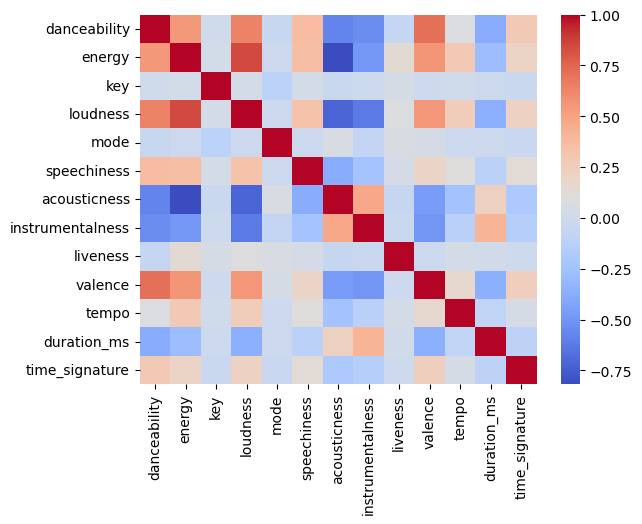

In [ ]:
sns.heatmap(filtered_songs.corr(), cmap='coolwarm')

<AxesSubplot:xlabel='danceability', ylabel='energy'>

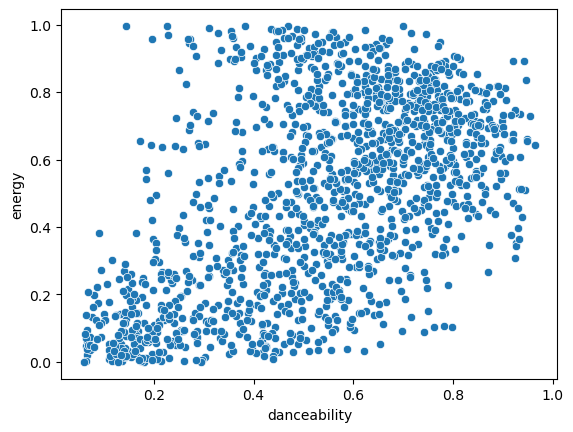

In [ ]:
sns.scatterplot(x='danceability', y='energy', data=filtered_songs)

KMeans clustering

In [ ]:
#import the model
from sklearn.cluster import KMeans

In [ ]:
#initialize the model
my_kmeans = KMeans(n_clusters=5)

In [ ]:
filtered_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, All Shook Up -Elvis Presley to Ravel: Boléro, M. 81 -Maurice Ravel
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1440 non-null   float64
 1   energy            1440 non-null   float64
 2   key               1440 non-null   int64  
 3   loudness          1440 non-null   float64
 4   mode              1440 non-null   int64  
 5   speechiness       1440 non-null   float64
 6   acousticness      1440 non-null   float64
 7   instrumentalness  1440 non-null   float64
 8   liveness          1440 non-null   float64
 9   valence           1440 non-null   float64
 10  tempo             1440 non-null   float64
 11  duration_ms       1440 non-null   int64  
 12  time_signature    1440 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 157.5+ KB


In [ ]:
filtered_songs.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name_artist,,,,,,,,,,,,,
All Shook Up -Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4
I've Got You Under My Skin - Remastered 1998 -Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4
Smoke Gets In Your Eyes -The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4
"What'd I Say, Pt. 1 & 2 -Ray Charles",0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,307053,4
Dream A Little Dream Of Me -Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,185067,4


In [ ]:
#drop column type as it contains Nan values. I dropped this column in filtering/dropping columns step above
# filtered_songs.drop('type', axis=1, inplace=True)

In [ ]:
# fit the model to the data
my_kmeans.fit(filtered_songs)

KMeans(n_clusters=5)

In [ ]:
#obtain the cluster labels. Predict the cluster for each data point
clusters = my_kmeans.predict(filtered_songs)

In [ ]:
# attach the clusters to the original dataframe
# filtered_songs[&amp;amp;quot;cluster&amp;amp;quot;] =clusters
filtered_songs['cluster'] = clusters

In [ ]:
filtered_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name_artist,,,,,,,,,,,,,,
All Shook Up -Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4,0
I've Got You Under My Skin - Remastered 1998 -Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4,0
Smoke Gets In Your Eyes -The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4,0
"What'd I Say, Pt. 1 & 2 -Ray Charles",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4,3
Dream A Little Dream Of Me -Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 -Pyotr Ilyich Tchaikovsky",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4,1
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique -Tristan Murail",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4,1
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) -Arnold Schoenberg",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3,0


In [ ]:
# using groupby method to elarn average values for each cluste
filtered_songs.groupby('cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.597872,0.550022,5.192229,-9.362075,0.677914,0.095804,0.400759,0.088907,0.169957,0.545624,115.737480,2.047588e+05,3.916155
1,0.186640,0.151211,3.571429,-21.372714,0.742857,0.049389,0.860143,0.767589,0.164489,0.068709,100.408314,1.202714e+06,3.628571
2,0.330616,0.276182,5.858824,-17.213424,0.647059,0.049481,0.730599,0.538946,0.168854,0.221278,107.302953,6.004320e+05,3.776471
3,0.183200,0.074050,7.500000,-29.108500,0.500000,0.042900,0.900500,0.867500,0.120000,0.052800,86.630000,3.703240e+06,4.000000
4,0.459767,0.426086,5.020588,-13.398982,0.617647,0.072107,0.560368,0.323682,0.189868,0.369324,117.526759,3.486697e+05,3.867647


In [63]:
# find out centroids
centroids = my_kmeans.cluster_centers_
pd.DataFrame(centroids, columns=filtered_songs.columns)

ValueError: Shape of passed values is (5, 13), indices imply (5, 14)